Variance ratio (Std/IS): inf


C:\Users\Color\AppData\Local\Temp\ipykernel_35072\1183482582.py:66: RuntimeWarning: divide by zero encountered in scalar divide
  print(f"Variance ratio (Std/IS): {np.var(std_results)/np.var(is_results):.2f}")


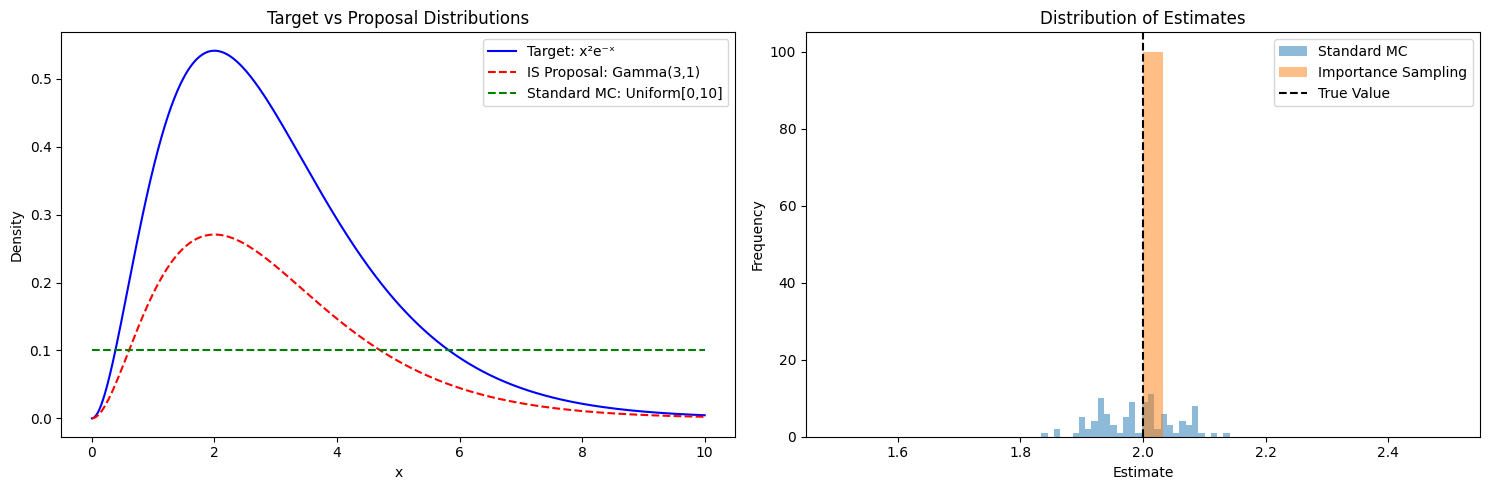

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

def f(x):
    """Target function: x^2 * exp(-x)"""
    return x**2 * np.exp(-x)


def proposal_distribution(x):
    """Proposal distribution: Gamma(3,1)"""
    return stats.gamma(3, scale=1).pdf(x)

# Create plotting grid
x = np.linspace(0, 10, 1000)
y = f(x)

# Setup subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5))

# Left subplot: Functions
ax1.plot(x, y, 'b-', label='Target: x²e⁻ˣ')
ax1.plot(x, proposal_distribution(x), 'r--', 
         label='IS Proposal: Gamma(3,1)')
ax1.plot(x, np.ones_like(x)/10, 'g--', 
         label='Standard MC: Uniform[0,10]')
ax1.set_title('Target vs Proposal Distributions')
ax1.set_xlabel('x')
ax1.set_ylabel('Density')
ax1.legend()

def standard_mc(n_samples):
    """Standard MC with uniform[0,10] sampling"""
    x = np.random.uniform(0, 10, n_samples)
    f_x = f(x)
    weights = 10  # area of uniform proposal
    return f_x * weights

def importance_sampling(n_samples):
    """IS with Gamma(3,1) proposal"""
    x = np.random.uniform(0, 10, n_samples)
    f_x = f(x)
    q_x = proposal_distribution(x)
    weights = 1/q_x
    return f_x * weights

# Simulation
n_samples = 1000
n_simulations = 100

std_results = np.array([np.mean(f(np.random.uniform(0, 10, n_samples))*10) 
                       for _ in range(n_simulations)])
is_samples = np.random.gamma(3, 1, (n_simulations, n_samples))
is_results = np.array([np.mean(f(x)/stats.gamma(3, scale=1).pdf(x)) 
                      for x in is_samples])

ax2.hist(std_results, alpha=0.5, label='Standard MC', bins=30)
ax2.hist(is_results, alpha=0.5, label='Importance Sampling', bins=30)
ax2.axvline(2.0, color='k', linestyle='--', label='True Value')
ax2.set_title('Distribution of Estimates')
ax2.set_xlabel('Estimate')
ax2.set_ylabel('Frequency')
ax2.legend()

plt.tight_layout()
print(f"Variance ratio (Std/IS): {np.var(std_results)/np.var(is_results):.2f}")